In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("Student_Performance.csv")

In [10]:
df.isnull().mean()*100

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [11]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

Text(0.5, 0, '  Performance Index')

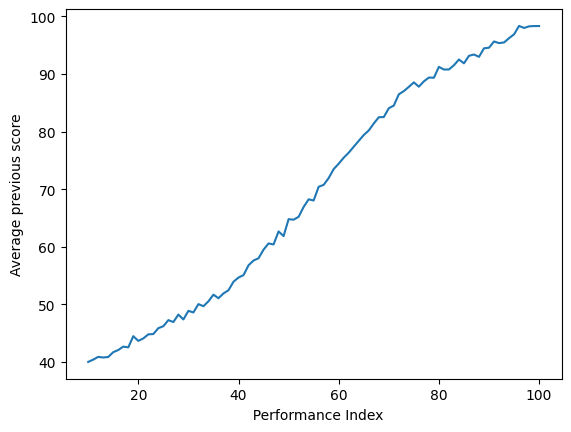

In [12]:
previous = df.groupby("Performance Index")["Previous Scores"].mean()
plt.plot(previous.index, previous.values)
plt.ylabel("Average previous score")
plt.xlabel("  Performance Index")
#once a topper always a topper

Text(0.5, 0, '  Performance Index')

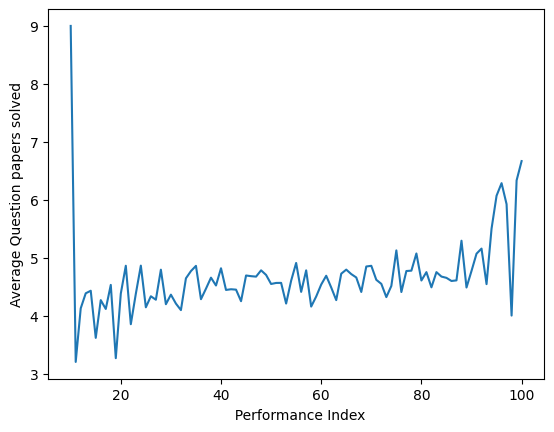

In [13]:
questionpapersreverse = df.groupby("Performance Index")["Sample Question Papers Practiced"].mean()
plt.plot(questionpapersreverse.index, questionpapersreverse.values)
plt.ylabel("Average Question papers solved")
plt.xlabel("  Performance Index")
#funny that topper haven't solved the question that much 

Text(0.5, 0, 'Performance Index')

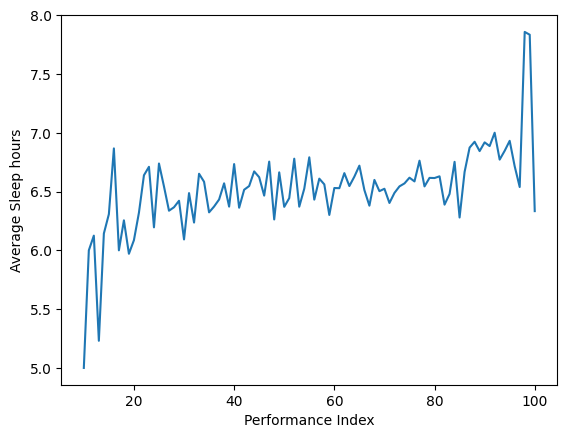

In [14]:
reverse = df.groupby("Performance Index")["Sleep Hours"].mean()
plt.plot(reverse.index, reverse.values)
plt.ylabel("Average Sleep hours")
plt.xlabel("Performance Index")
# toppers usually sleep between 7.5 to 8 hours 

<Axes: xlabel='Performance Index', ylabel='Density'>

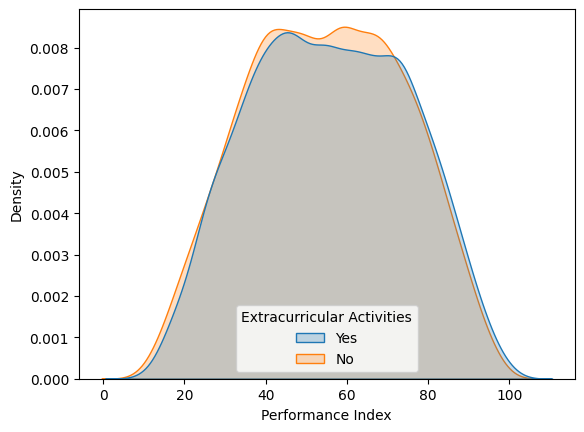

In [15]:
sns.kdeplot(data=df, x="Performance Index", hue="Extracurricular Activities", fill=True)
# max students have performance index between 30 to 70 
#and the students with extra cirricular are more than without in toppers 
#while in range of max density where perfomance is between 40 to 70 have no extraciriccular activity but still score is medium 

<Axes: xlabel='Sleep Hours', ylabel='Density'>

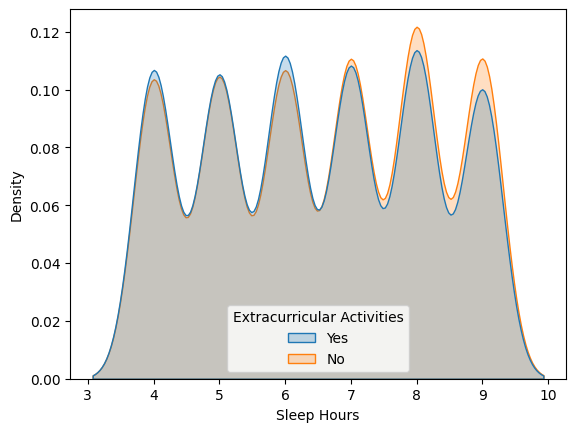

In [16]:
sns.kdeplot(data = df , x="Sleep Hours" , hue = "Extracurricular Activities",fill=True)
#no of people who sleep more are not more in extracurricular activities

C:\Users\Piyush\AppData\Local\Temp\ipykernel_5604\1616148026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({'Yes': 1, 'No': 0})


<Axes: >

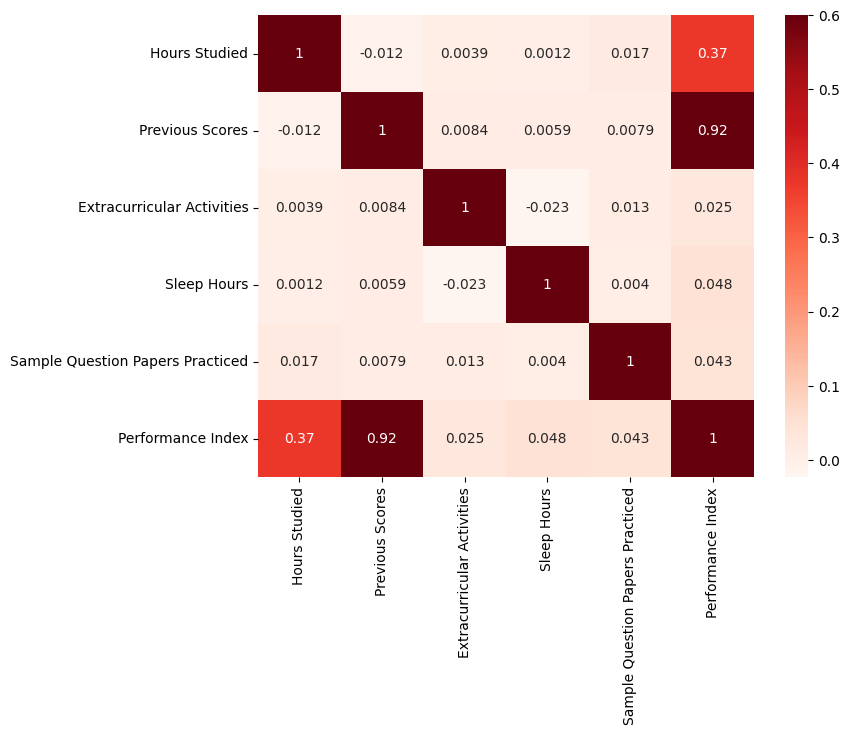

In [17]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({'Yes': 1, 'No': 0})
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="Reds",annot=True,annot_kws={"size":10},vmax=0.6)
#check out all the co-relations 
# very less students become overconfident and reduce the hours studied when previous score is high 
# AS above also people involved in Extracirricular activities sleep less 
# Also it is visible that the number of Hours studied is proportional to the Performance Index

<Axes: xlabel='Previous Scores', ylabel='Density'>

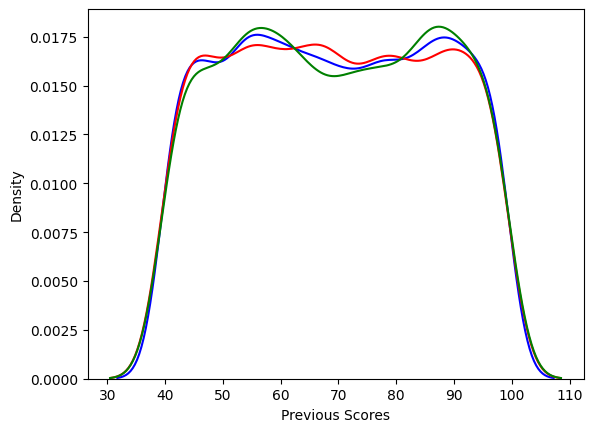

In [18]:
sns.kdeplot(df["Previous Scores"],color="blue")
sns.kdeplot(df[df["Extracurricular Activities"] == 0]["Previous Scores"], color="red")
sns.kdeplot(df[df["Extracurricular Activities"] == 1]["Previous Scores"], color="green")
# when the previous score in 60 to 80 then people quit the Extracirricular Activities and
#when they get above 80 score then they join Extracirricular Activities

([<matplotlib.patches.Wedge at 0x1c51eb01af0>,
 [Text(-0.017969208902882738, 1.099853220903319, '0'),
  Text(0.017969311878573032, -1.0998532192209152, '1')],
 [Text(-0.009801386674299674, 0.5999199386745375, '50.5%'),
  Text(0.009801442842858017, -0.5999199377568628, '49.5%')])

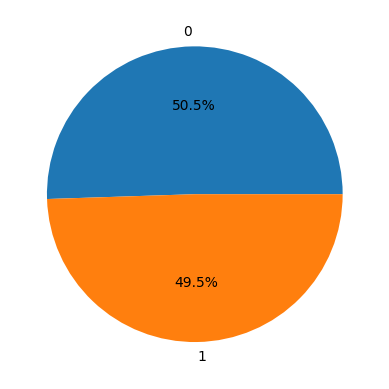

In [19]:
extra = df["Extracurricular Activities"].value_counts()
plt.pie( extra.values,labels=extra.index, autopct='%1.1f%%' )
#data is very close

Text(0, 0.5, ' Average Performance Index')

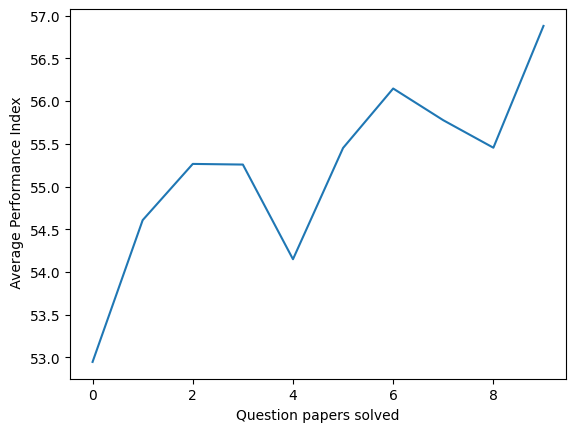

In [20]:
questionpapers = df.groupby("Sample Question Papers Practiced")["Performance Index"].mean()
plt.plot(questionpapers.index, questionpapers.values)
plt.xlabel("Question papers solved")
plt.ylabel(" Average Performance Index")
#self explaintary

In [21]:
studyhours = df.groupby("Hours Studied")["Performance Index"].mean()

Text(0, 0.5, 'Average Performance Index')

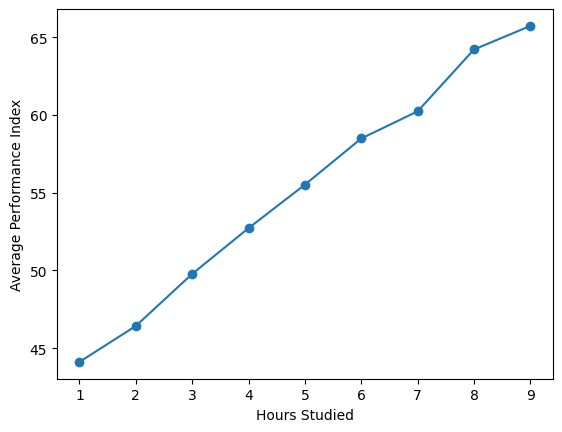

In [24]:
plt.plot(studyhours.index, studyhours.values, marker='o')
plt.xlabel("Hours Studied")
plt.ylabel("Average Performance Index")
#self explaintary

In [44]:
sleephours = df.groupby("Sleep Hours")["Performance Index"].mean()

Text(0, 0.5, 'Average Performance Index')

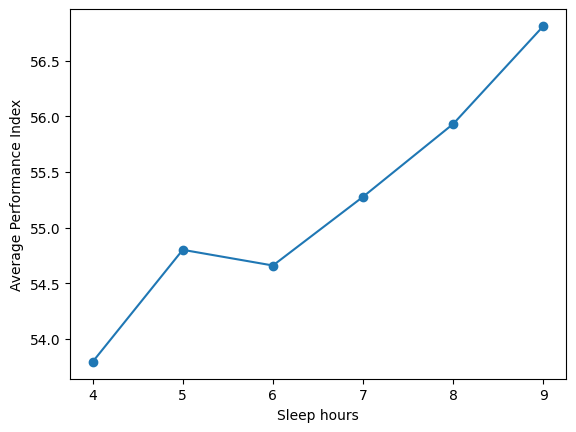

In [45]:
plt.plot(sleephours.index, sleephours.values, marker='o')
plt.xlabel("Sleep hours")
plt.ylabel("Average Performance Index")
#self explaintary

Predicting performance index on the base of hours studied

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 321.5489742021378
R-squared: 0.155293078254643


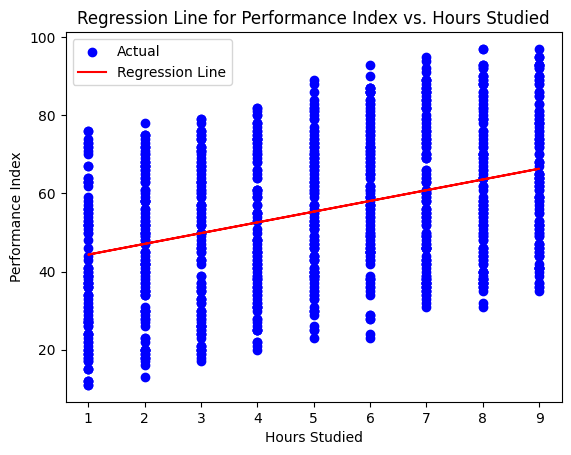

In [32]:
df=df.dropna() #dropping null values

#splitting the data set in testing and training data sets
X=df[['Hours Studied']]
y=df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Loading the data sets in model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Mean Squared Error: 321.5489742021378
# R-squared: 0.155293078254643

#Thus, linear regression is not viable for hours studied vs student performance. But, we can plot it for a visualization

plt.scatter(X_test['Hours Studied'], y_test, color='blue', label="Actual")
plt.plot(X_test['Hours Studied'], y_pred, color='red', label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Regression Line for Performance Index vs. Hours Studied")
plt.legend()
plt.show()

Predicting performance index on the basis of hours studied, previous scores and question papers practiced

Mean Squared Error: 4.862364811169536
R-squared: 0.9868792226097673


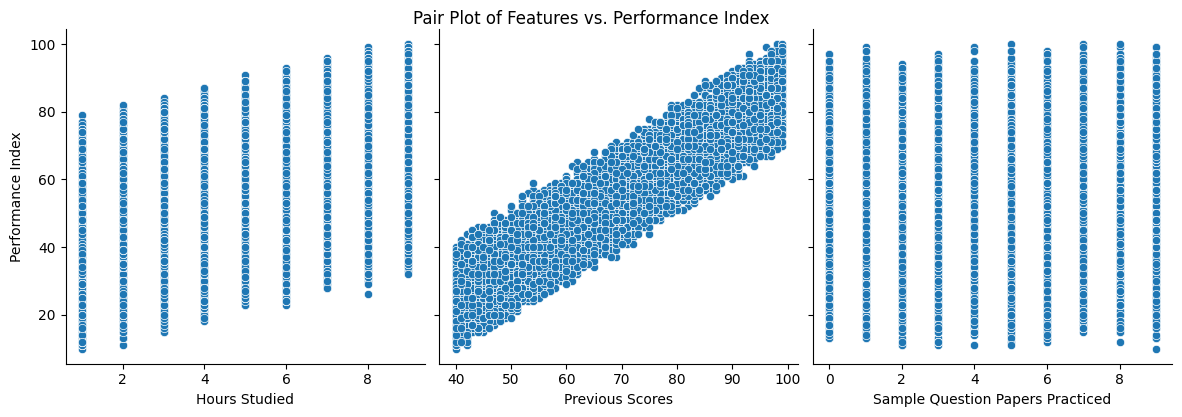

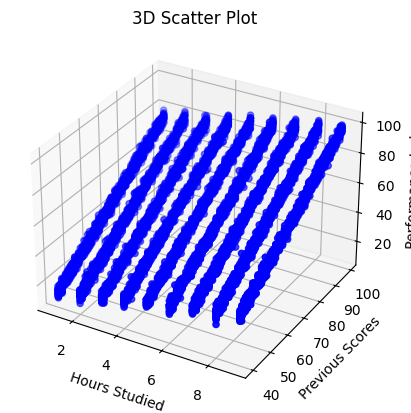

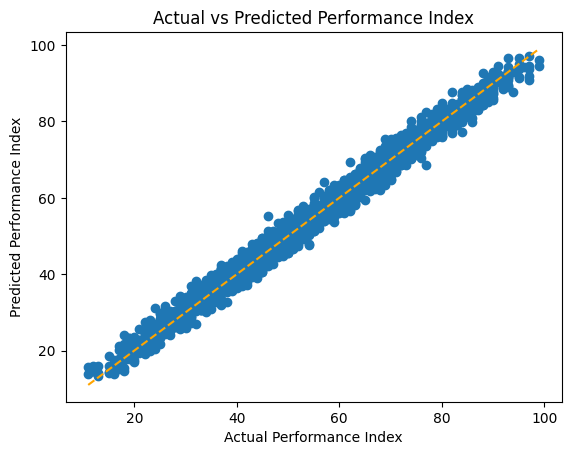

In [43]:
#Loading the data sets in model
df = df.dropna()
X = df[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]
y = df['Performance Index']

#Splitting the data set in testing and training data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Loading the data sets in model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Mean Squared Error: 4.862364811169536
# R-squared: 0.9868792226097673

#Thus, if we consider multiple factors, we get an accuracy of over 95.2% and a deviation of 0.014%

#Visualizing
sns.pairplot(df, x_vars=['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced'], y_vars='Performance Index', height=4, aspect=1, kind='scatter')
plt.suptitle("Pair Plot of Features vs. Performance Index", y=1.02)
plt.show()


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
fig = plt.figure() #3D plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hours Studied'], df['Previous Scores'], df['Performance Index'], c='blue', marker='o')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')
plt.title("3D Scatter Plot")
plt.show()

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='orange')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()

